# Energy Efficiency Analysis
### Group Members: Rishi, Michael, and Cade

---

## Introduction
This project analyzes the heating and cooling load requirements of residential buildings based on architectural features. The goal is to understand how these features influence energy consumption and develop models to predict energy loads.

**Dataset:** [UCI Energy Efficiency Dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

### Objectives
- Perform exploratory data analysis (EDA).
- Build regression models for prediction.
- Document challenges and reflect on contributions.


## Tasks: 

**Literature Research:**
- Briefly describe the challenge of minimizing residential HVAC energy consumption 
- Summarize the value of a data model in the context of the conventional approach to HVAC energy prediction

Some places to start are:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9571769/

https://www.sciencedirect.com/science/article/pii/S1364032114007151
    
https://www.mdpi.com/1424-8220/20/22/6419



**Exploratory Data Analysis**
- Describe (in words) the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.

**Model Building**
- Build 2 separate data models to estimate the heating load and the cooling load based on the appropriate architectural features given in your dataset
- Assess the model quality
- Build the input data interface for using the model
- Using your model determine projected heating load and cooling load for 3 possible feature combinations in the table below:

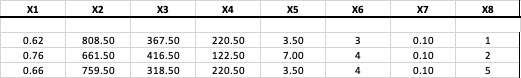


               
       
**Documentation**
- Training video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf.
- Final ipynb file (see deliverables below)

# Markdown Cells Below:

Task 1: Import the dataset, clean it, and prepare it for analysis.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScalerxx
import matplotlib.pyplot as plt

Task 2: Change columns for readability
The task renames the columns of the Data Frame for clarity
1: df.columns lists the columns to be changed
2. [
'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
'Overall_Height', 'Orientation', 'Glazing_Area',
'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'
] assigns the columns the names listed
3: df.columns = [
'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
'Overall_Height', 'Orientation', 'Glazing_Area',
'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'
] applies the changes we listed and renames the columns of the Data Frame

Task 3: (EDA): Plot boxplots to visually inspect the distribution of each feature.
This task creates a box plot for the data in the data set.
1: plt.figure(figsize(15,10)) makes the figure 15 inches by 10 inches
2: df.boxplot(column=['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
'Overall_Height', 'Heating_Load', 'Cooling_Load']) creates the box plot with labels
3: plt.title("Boxplot of Architectural Features and Target Variables") creates a title so the view can understand what exactly is being presented
4: plt.xticks(rotation=45) rotates the labels by 45 degrees for it to be easier to read
5 plt.show() shows the plot with everything listed

Task 4: Features are the input variables (independent variables) used to make predictions, while targets are the output variables (dependent variables) that the model aims to predict. We aim to incorporate this in our code.
The task defines independent (Features) and dependent (Targets) variables in the code.
1: X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']] sets columns in the Data Frame as Features
2: y_heating = df['Heating_Load'] sets the 'Heating_Load' column as a Target
3: y_cooling = df['Cooling_Load'] sets the 'Cooling_Load' column as a Target as well

Task 5 and 6: Separate the dataset into features and target variables, then split into training and testing sets.
This task splits the dataset into training and testing sets for the 'Heating_Load' and ' Cooling_Load' variables
1: X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y_heating, test_size=0.2, random_state=42) splits the data into training and testing sets for 'Heating_Load'
2: X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cooling, test_size=0.2, random_state=42) splits the data into training and testing sets for 'Cooling_Load'

Task 7: Scaling the features can help make sure that all features are one a similar scale.
This task is used to scale the features of the dataset of both Heating Load and Cooling Load, which is important for improving performance
1: scaler = StandardScaler() creates a StandardScaler from the scikit-learn module to provide a range
2: X_train_h = scaler.fit_transform(X_train_h) applies the StandardScaler to the training data from 'Heating_Load'
3: X_test_h = scaler.transform(X_test_h) applies the StandardScaler to the testing data from 'Heating_Load'
4: X_train_c = scaler.fit_transform(X_train_c) the same is done for the training data for 'Cooling_Load'
5: X_test_c = scaler.transform(X_test_c) the same is done for the testing data for 'Cooling_Load'

Task 8: User Interface - Implement an interactive interface to enter estimates, add observations, and retrain the model.
This Task allows for User Interface for Predictions or Adding Data
def user_interface():
global df, model_heating, model_cooling, scaler # Use global variables for the dataset, models, and scaler.

while True:  # Start an infinite loop for the menu until the user exits.
    print("\nMenu:")  # Display the menu header.
    print("1. Predict Heating and Cooling Load")  # Option for predictions.
    print("2. Add a New Observation")  # Option for adding a new observation.
    print("3. Exit")  # Option to exit the program.
    choice = input("Enter your choice: ").strip()  # Prompt user for a menu option and clean the input.

    if choice == '1':  # Check if the user wants to predict heating and cooling loads.
        try:
            print("Enter architectural features for prediction:")  # Prompt the user for input data.
            input_data = {  # Collect feature inputs from the user.
                'Relative_Compactness': float(input("Relative Compactness (0 to 1): ").strip()),  # Compactness input.
                'Surface_Area': float(input("Surface Area: ").strip()),  # Surface area input.
                'Wall_Area': float(input("Wall Area: ").strip()),  # Wall area input.
                'Roof_Area': float(input("Roof Area: ").strip()),  # Roof area input.
                'Overall_Height': float(input("Overall Height: ").strip()),  # Overall height input.
                'Orientation': int(input("Orientation (1-4): ").strip()),  # Orientation input.
                'Glazing_Area': float(input("Glazing Area (0 to 1): ").strip()),  # Glazing area input.
                'Glazing_Area_Distribution': int(input("Glazing Area Distribution (1-4): ").strip())  # Glazing distribution.
            }

            input_df = pd.DataFrame([input_data])  # Convert the input data into a DataFrame.
            scaled_input = scaler.transform(input_df)  # Scale the input data using the scaler.

            heating_pred = model_heating.predict(scaled_input)  # Predict heating load.
            cooling_pred = model_cooling.predict(scaled_input)  # Predict cooling load.
            print(f"Predicted Heating Load: {heating_pred[0]:.2f}")  # Display the predicted heating load.
            print(f"Predicted Cooling Load: {cooling_pred[0]:.2f}")  # Display the predicted cooling load.

        except ValueError:  # Handle invalid inputs gracefully.
            print("Invalid input. Please enter numerical values for all fields.")  # Error message for invalid input.

    elif choice == '2':  # Check if the user wants to add a new observation.
        try:
            print("Enter new observation values for features:")  # Prompt the user to input new data.
            new_data = {  # Collect feature and target inputs from the user.
                'Relative_Compactness': float(input("Relative Compactness (0 to 1): ").strip()),  # Compactness input.
                'Surface_Area': float(input("Surface Area: ").strip()),  # Surface area input.
                'Wall_Area': float(input("Wall Area: ").strip()),  # Wall area input.
                'Roof_Area': float(input("Roof Area: ").strip()),  # Roof area input.
                'Overall_Height': float(input("Overall Height: ").strip()),  # Overall height input.
                'Orientation': int(input("Orientation (1-4): ").strip()),  # Orientation input.
                'Glazing_Area': float(input("Glazing Area (0 to 1): ").strip()),  # Glazing area input.
                'Glazing_Area_Distribution': int(input("Glazing Area Distribution (1-4): ").strip()),  # Glazing distribution.
                'Heating_Load': float(input("Heating Load (Target): ").strip()),  # Heating load input.
                'Cooling_Load': float(input("Cooling Load (Target): ").strip())  # Cooling load input.
            }

            new_df = pd.DataFrame([new_data])  # Convert the new data into a DataFrame.
            df = pd.concat([df, new_df], ignore_index=True)  # Add the new data to the dataset.
            print("New observation added. Updating models...")  # Notify the user that the data has been added.

            X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',  # Select feature columns.
                    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
            y_heating = df['Heating_Load']  # Select the heating load target column.
            y_cooling = df['Cooling_Load']  # Select the cooling load target column.

            X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y_heating, test_size=0.2, random_state=42)  # Split data for heating load.
            X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cooling, test_size=0.2, random_state=42)  # Split data for cooling load.

            X_train_h = scaler.fit_transform(X_train_h)  # Scale the training data for heating load.
            X_test_h = scaler.transform(X_test_h)  # Scale the test data for heating load.
            X_train_c = scaler.fit_transform(X_train_c)  # Scale the training data for cooling load.
            X_test_c = scaler.transform(X_test_c)  # Scale the test data for cooling load.

            model_heating.fit(X_train_h, y_train_h)  # Retrain the heating load model.
            model_cooling.fit(X_train_c, y_train_c)  # Retrain the cooling load model.
            print("Models updated successfully.")  # Notify the user that the models are updated.

        except ValueError:  # Handle invalid inputs gracefully.
            print("Invalid input. Please enter valid numerical values.")  # Error message for invalid input.

    elif choice == '3':  # Check if the user wants to exit.
        print("Exiting the program.")  # Notify the user about exiting.
        break  # Exit the infinite loop.

    else:  # Handle invalid menu choices.
        print("Invalid choice. Please try again.")  # Error message for invalid menu selection.

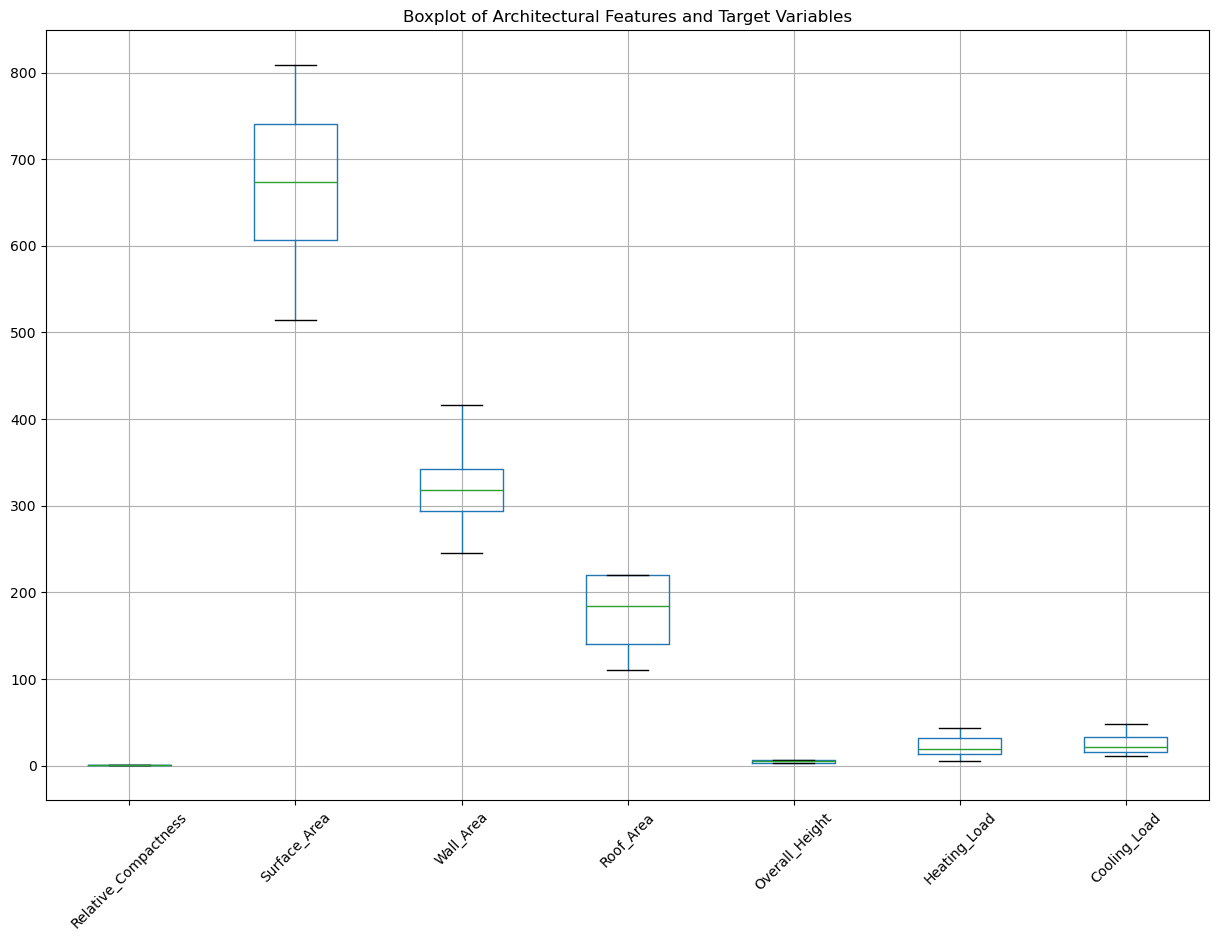

Heating Load Model Evaluation:
R² Score: 0.9114295867784564
Mean Absolute Error: 2.20108104408642

Cooling Load Model Evaluation:
R² Score: 0.8933380823236925
Mean Absolute Error: 2.194132970569827

Menu:
1. Predict Heating and Cooling Load
2. Add a New Observation
3. Exit


In [ ]:
# Energy Efficiency Tool By Rishi, Michael, and Cade
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Task 1 Load the dataset from a local file
file_path = "ENB2012_data.xlsx" 
df = pd.read_excel(file_path)

# Task 2 Rename columns for readability
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area',
    'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'
]

# Task 3: (EDA): Boxplot for Features and Targets
plt.figure(figsize=(15, 10))
df.boxplot(column=['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                   'Overall_Height', 'Heating_Load', 'Cooling_Load'])
plt.title("Boxplot of Architectural Features and Target Variables")
plt.xticks(rotation=45)
plt.show()

# Task 4: Features and targets
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

# Task 5: Split data for Heating Load model
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y_heating, test_size=0.2, random_state=42)

# Task 6: Split data for Cooling Load model
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_h = scaler.fit_transform(X_train_h)
X_test_h = scaler.transform(X_test_h)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

# Build and Train Heating Load Model
model_heating = LinearRegression()
model_heating.fit(X_train_h, y_train_h)
y_pred_h = model_heating.predict(X_test_h)

# Build and Train Cooling Load Model
model_cooling = LinearRegression()
model_cooling.fit(X_train_c, y_train_c)
y_pred_c = model_cooling.predict(X_test_c)

# Evaluate Heating Load Model
print("Heating Load Model Evaluation:")
print("R² Score:", r2_score(y_test_h, y_pred_h))
print("Mean Absolute Error:", mean_absolute_error(y_test_h, y_pred_h))

# Evaluate Cooling Load Model
print("\nCooling Load Model Evaluation:")
print("R² Score:", r2_score(y_test_c, y_pred_c))
print("Mean Absolute Error:", mean_absolute_error(y_test_c, y_pred_c))

# Task 7: User Interface for Predictions or Adding Data # By Rishi
def user_interface():
    global df, model_heating, model_cooling, scaler

    while True:
        print("\nMenu:")
        print("1. Predict Heating and Cooling Load")
        print("2. Add a New Observation")
        print("3. Exit")
        choice = input("Enter your choice: ").strip()

        if choice == '1':  # Predict Heating and Cooling Load
            try:
                print("Enter architectural features for prediction:")
                input_data = {
                    'Relative_Compactness': float(input("Relative Compactness (0 to 1): ").strip()),
                    'Surface_Area': float(input("Surface Area: ").strip()),
                    'Wall_Area': float(input("Wall Area: ").strip()),
                    'Roof_Area': float(input("Roof Area: ").strip()),
                    'Overall_Height': float(input("Overall Height: ").strip()),
                    'Orientation': int(input("Orientation (1-4): ").strip()),
                    'Glazing_Area': float(input("Glazing Area (0 to 1): ").strip()),
                    'Glazing_Area_Distribution': int(input("Glazing Area Distribution (1-4): ").strip())
                }

                # Convert input to DataFrame and scale it
                input_df = pd.DataFrame([input_data])
                scaled_input = scaler.transform(input_df)

                # Predictions
                heating_pred = model_heating.predict(scaled_input)
                cooling_pred = model_cooling.predict(scaled_input)
                print(f"Predicted Heating Load: {heating_pred[0]:.2f}")
                print(f"Predicted Cooling Load: {cooling_pred[0]:.2f}")

            except ValueError:
                print("Invalid input. Please enter numerical values for all fields.")

        elif choice == '2':  # Add a New Observation
            try:
                print("Enter new observation values for features:")
                new_data = {
                    'Relative_Compactness': float(input("Relative Compactness (0 to 1): ").strip()),
                    'Surface_Area': float(input("Surface Area: ").strip()),
                    'Wall_Area': float(input("Wall Area: ").strip()),
                    'Roof_Area': float(input("Roof Area: ").strip()),
                    'Overall_Height': float(input("Overall Height: ").strip()),
                    'Orientation': int(input("Orientation (1-4): ").strip()),
                    'Glazing_Area': float(input("Glazing Area (0 to 1): ").strip()),
                    'Glazing_Area_Distribution': int(input("Glazing Area Distribution (1-4): ").strip()),
                    'Heating_Load': float(input("Heating Load (Target): ").strip()),
                    'Cooling_Load': float(input("Cooling Load (Target): ").strip())
                }

                # Append new data to DataFrame
                new_df = pd.DataFrame([new_data])
                df = pd.concat([df, new_df], ignore_index=True)
                print("New observation added. Updating models...")

                # Retrain models
                X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
                y_heating = df['Heating_Load']
                y_cooling = df['Cooling_Load']

                X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y_heating, test_size=0.2, random_state=42)
                X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

                X_train_h = scaler.fit_transform(X_train_h)
                X_test_h = scaler.transform(X_test_h)
                X_train_c = scaler.fit_transform(X_train_c)
                X_test_c = scaler.transform(X_test_c)

                model_heating.fit(X_train_h, y_train_h)
                model_cooling.fit(X_train_c, y_train_c)
                print("Models updated successfully.")

            except ValueError:
                print("Invalid input. Please enter valid numerical values.")

        elif choice == '3':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please try again.")

# Run the user interface and Video #Done by Everyone
user_interface()